# 필요한 라이브러리 불러오기

In [1]:
import math  # 수학 패키지 임포트
import torch  # 파이토치 모듈 임포트
import matplotlib.pyplot as plt  # 시각화 라이브로 matplotlib 임포트

# ❶ -pi부터 pi사이에서 점을 1000개 추출

In [8]:
x = torch.linspace(-math.pi, math.pi, 1000)
# linspace(A, B, C)
# 시작점 A부터 종료점 B까지 데이터 C개를 반환합니다.
# 이때 모든 데이터의 간격은 같습니다.
# A : 시작 지점, B : 종료 지점, C : 출력할 데이터 개수

# ❷ 실제 사인곡선에서 추출한 값으로 y 만들기

In [3]:
y = torch.sin(x)
# sin(A)
# 입력 A에 대한 사인 함수의 값을 반환합니다.

# ❸ 임의의 가중치(계수)를 뽑아 예측용 y 만들기

In [4]:
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())
# randn()
# 정규분포를 따르는 랜덤한 값을 반환합니다.

# 사인 함수를 근사할 3차 다항식 정의

In [5]:
y_random = a * x**3 + b * x**2 + c * x + d

# 그래프 출력하기

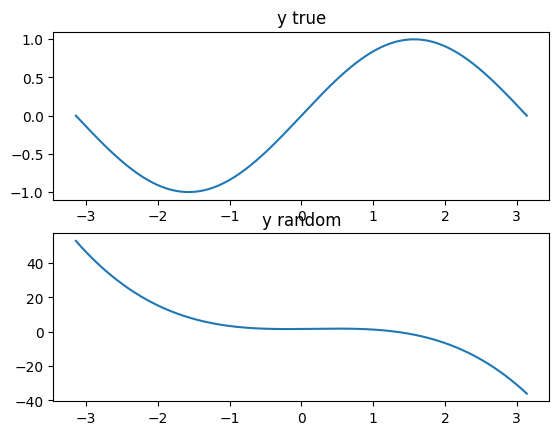

In [6]:
# ➍ 실제 y값으로 사인곡선 만들기
plt.subplot(2, 1, 1)
# subplot는 여러 개의 그래프를 그려줍니다.
# subplot() 함수에 인수 3개는 행의 개수, 열의 개수, 위치를 뜻합니다.

plt.title("y true")
# title(str)
# 그림의 제목을 지정합니다. str이 제목입니다.

plt.plot(x, y)
# plot(x, y)
# 그래프를 그려줍니다. x는 입력값을, y는 함숫값을 나타냅니다.


# ➎ 임의의 가중치로 만든 예측용 y값으로 사인곡선 만들기
plt.subplot(2, 1, 2)
plt.title("y random")
plt.plot(x, y_random)

# ➏ 그래프 출력하기
plt.show()

# 학습 전후 비교해보기

epoch1 loss:308298.78125
epoch101 loss:845.2489013671875
epoch201 loss:707.0465698242188
epoch301 loss:595.0801391601562
epoch401 loss:500.9696044921875
epoch501 loss:421.86431884765625
epoch601 loss:355.3692626953125
epoch701 loss:299.4730224609375
epoch801 loss:252.48512268066406
epoch901 loss:212.98468017578125
epoch1001 loss:179.77764892578125
epoch1101 loss:151.86083984375
epoch1201 loss:128.39100646972656
epoch1301 loss:108.65911102294922
epoch1401 loss:92.06961822509766
epoch1501 loss:78.12177276611328
epoch1601 loss:66.39466857910156
epoch1701 loss:56.5345573425293
epoch1801 loss:48.24399948120117
epoch1901 loss:41.273075103759766


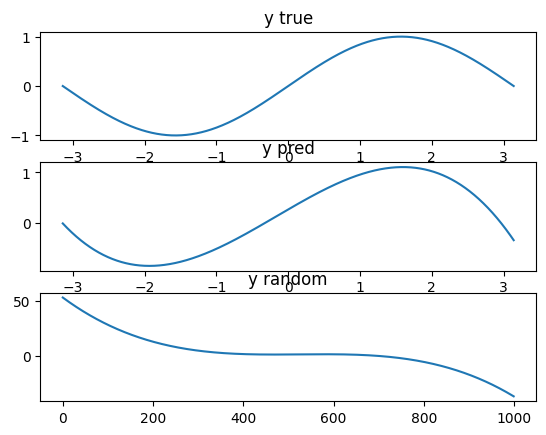

In [7]:
learning_rate = 1e-6  # 학습률 정의

for epoch in range(2000):  # 학습 2000번 진행
    y_pred = a * x**3 + b * x**2 + c * x + d

    loss = (y_pred - y).pow(2).sum().item()  # 1. 손실 정의
    # pow(2)는 제곱을, sum()은 합, item() 실수값으로 반환하라는 뜻
    if epoch % 100 == 0:
      print(f"epoch{epoch+1} loss:{loss}")

    grad_y_pred = 2.0 * (y_pred - y)  # 2. 기울기의 미분값
    grad_a = (grad_y_pred * x ** 3).sum()
    grad_b = (grad_y_pred * x ** 2).sum()
    grad_c = (grad_y_pred * x).sum()
    grad_d = grad_y_pred.sum()

    # 3. 가중치 업데이트
    # 가중치는 기울기의 반대 방향으로 움직입니다.
    # 만약 기울기가 양수라면 빼주고, 음수라면 더해줘야 하므로 기울기에 -1을 곱해줍니다.
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

plt.subplot(3, 1, 1)
plt.title("y true")
plt.plot(x, y)
plt.subplot(3, 1, 2)
plt.title("y pred")
plt.plot(x, y_pred)
plt.subplot(3, 1, 3)
plt.plot(y_random)
plt.title("y random")
plt.show()